# Insurance Assessment




The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The following variables are discrete:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are dummy variables.

## Importing the needed libries

In [1]:
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import os
os.chdir('C:/Users/jayde/Desktop/all')

## Loading the data

In [2]:
TRAIN_DATA = pd.read_csv("train.csv")
TEST_DATA = pd.read_csv("test.csv")

### Converting the datatypes as per the data is needed to be converted

In [3]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

In [4]:
CONTINUOUS_COLUMNS = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]

In [5]:
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]

In [6]:
DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

## Concatenating each test, train

In [7]:
categorical_data = pd.concat([TRAIN_DATA[CATEGORICAL_COLUMNS], TEST_DATA[CATEGORICAL_COLUMNS]])
continuous_data = pd.concat([TRAIN_DATA[CONTINUOUS_COLUMNS], TEST_DATA[CONTINUOUS_COLUMNS]])
discrete_data = pd.concat([TRAIN_DATA[DISCRETE_COLUMNS], TEST_DATA[DISCRETE_COLUMNS]])
dummy_data = pd.concat([TRAIN_DATA[DUMMY_COLUMNS], TEST_DATA[DUMMY_COLUMNS]])

## Making Plots of catagorical data's too visualize insights of the data

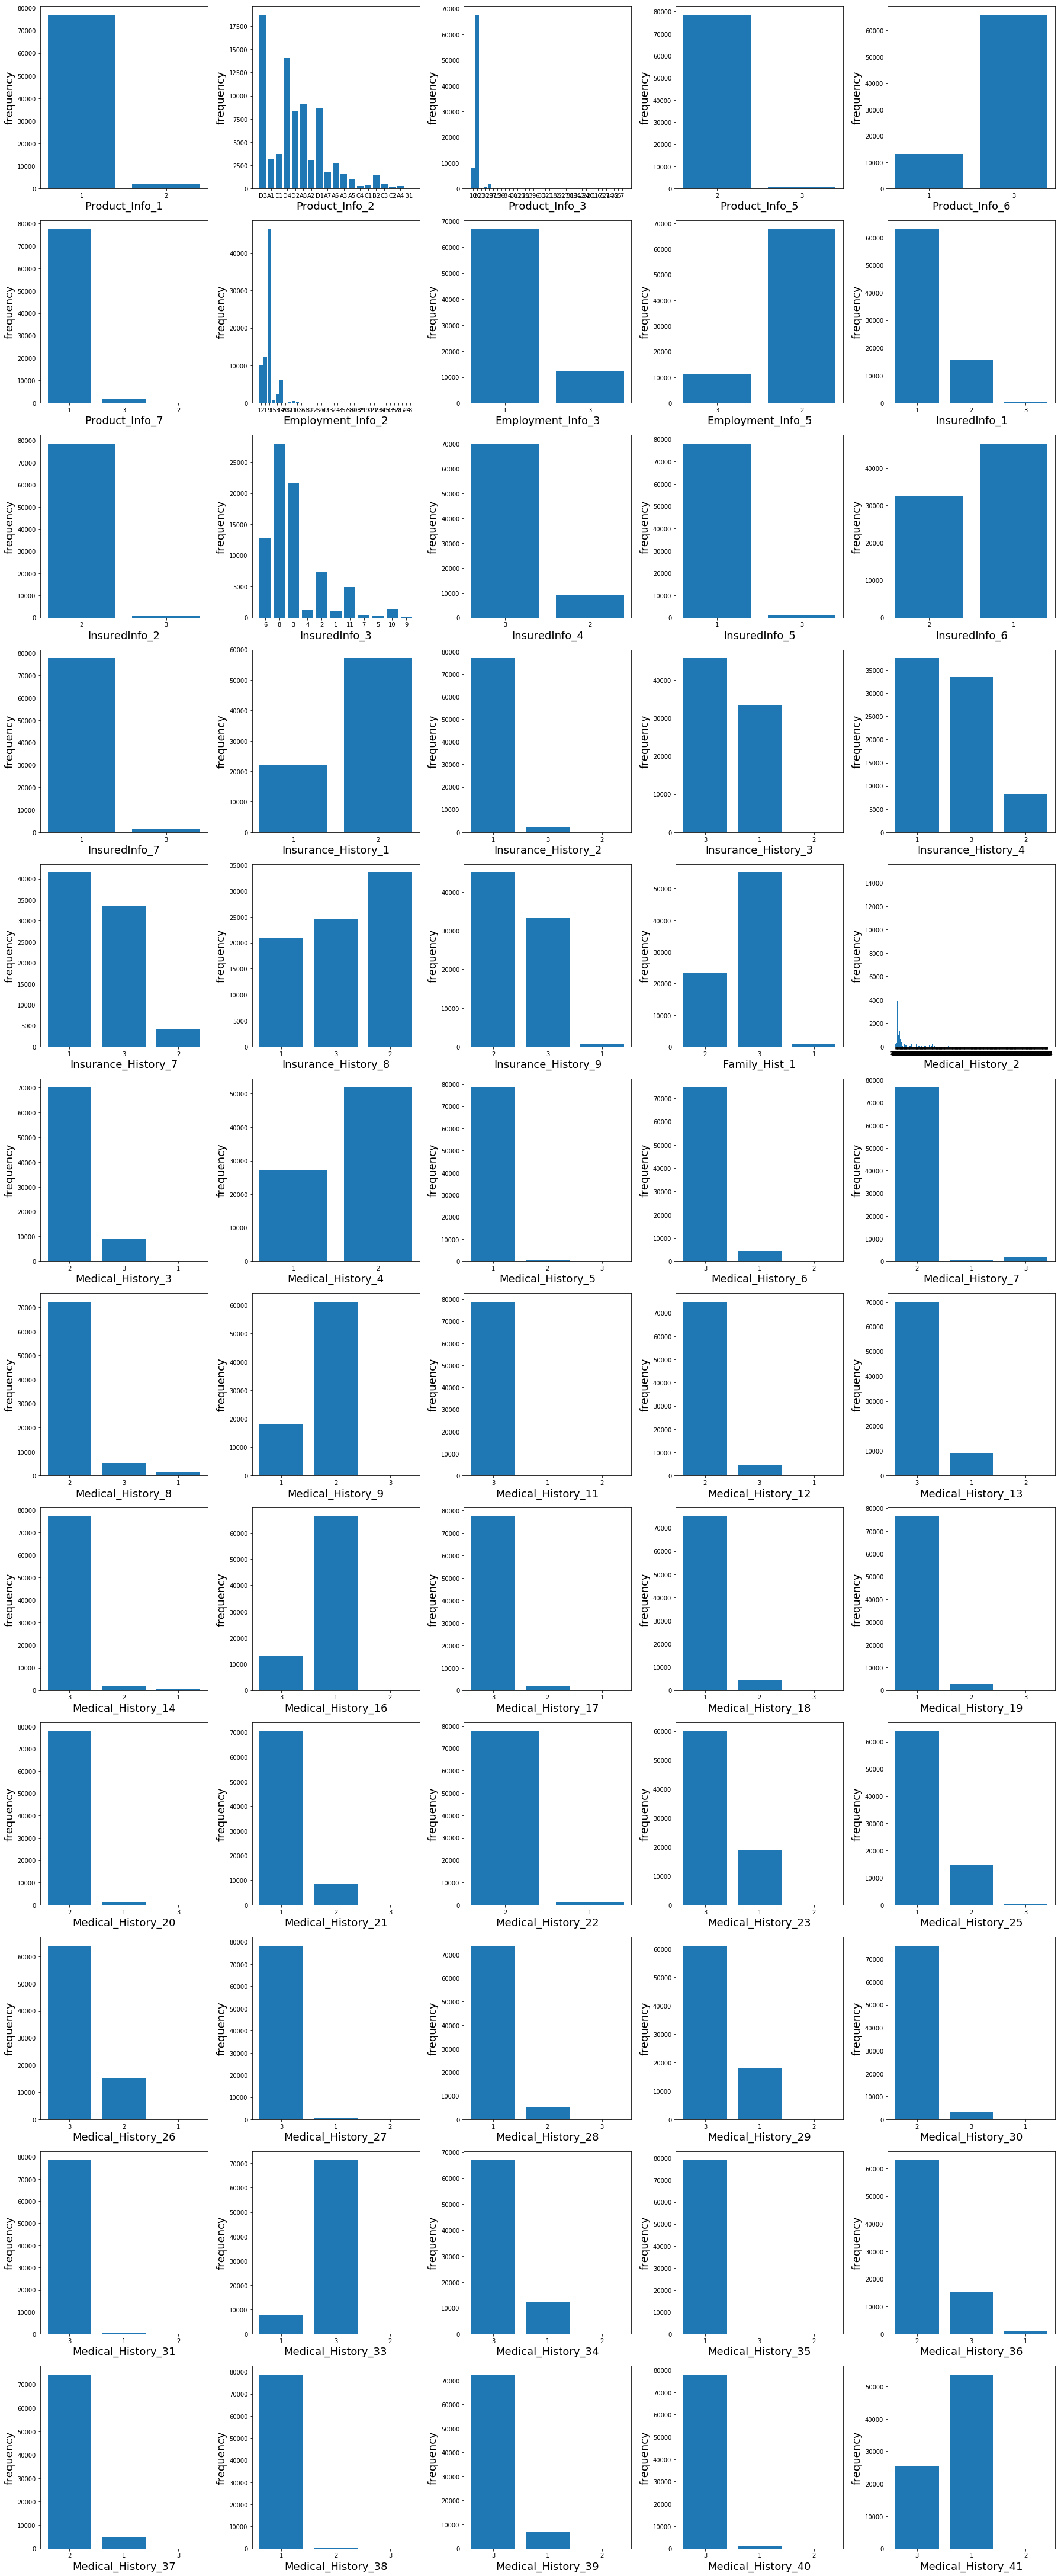

In [8]:
def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

## To handle the categorical data I transformed them into dummy data.

In [9]:
categorical_data = categorical_data.applymap(str)
categorical_data = pd.get_dummies(categorical_data, drop_first=True)

## To display continuous data

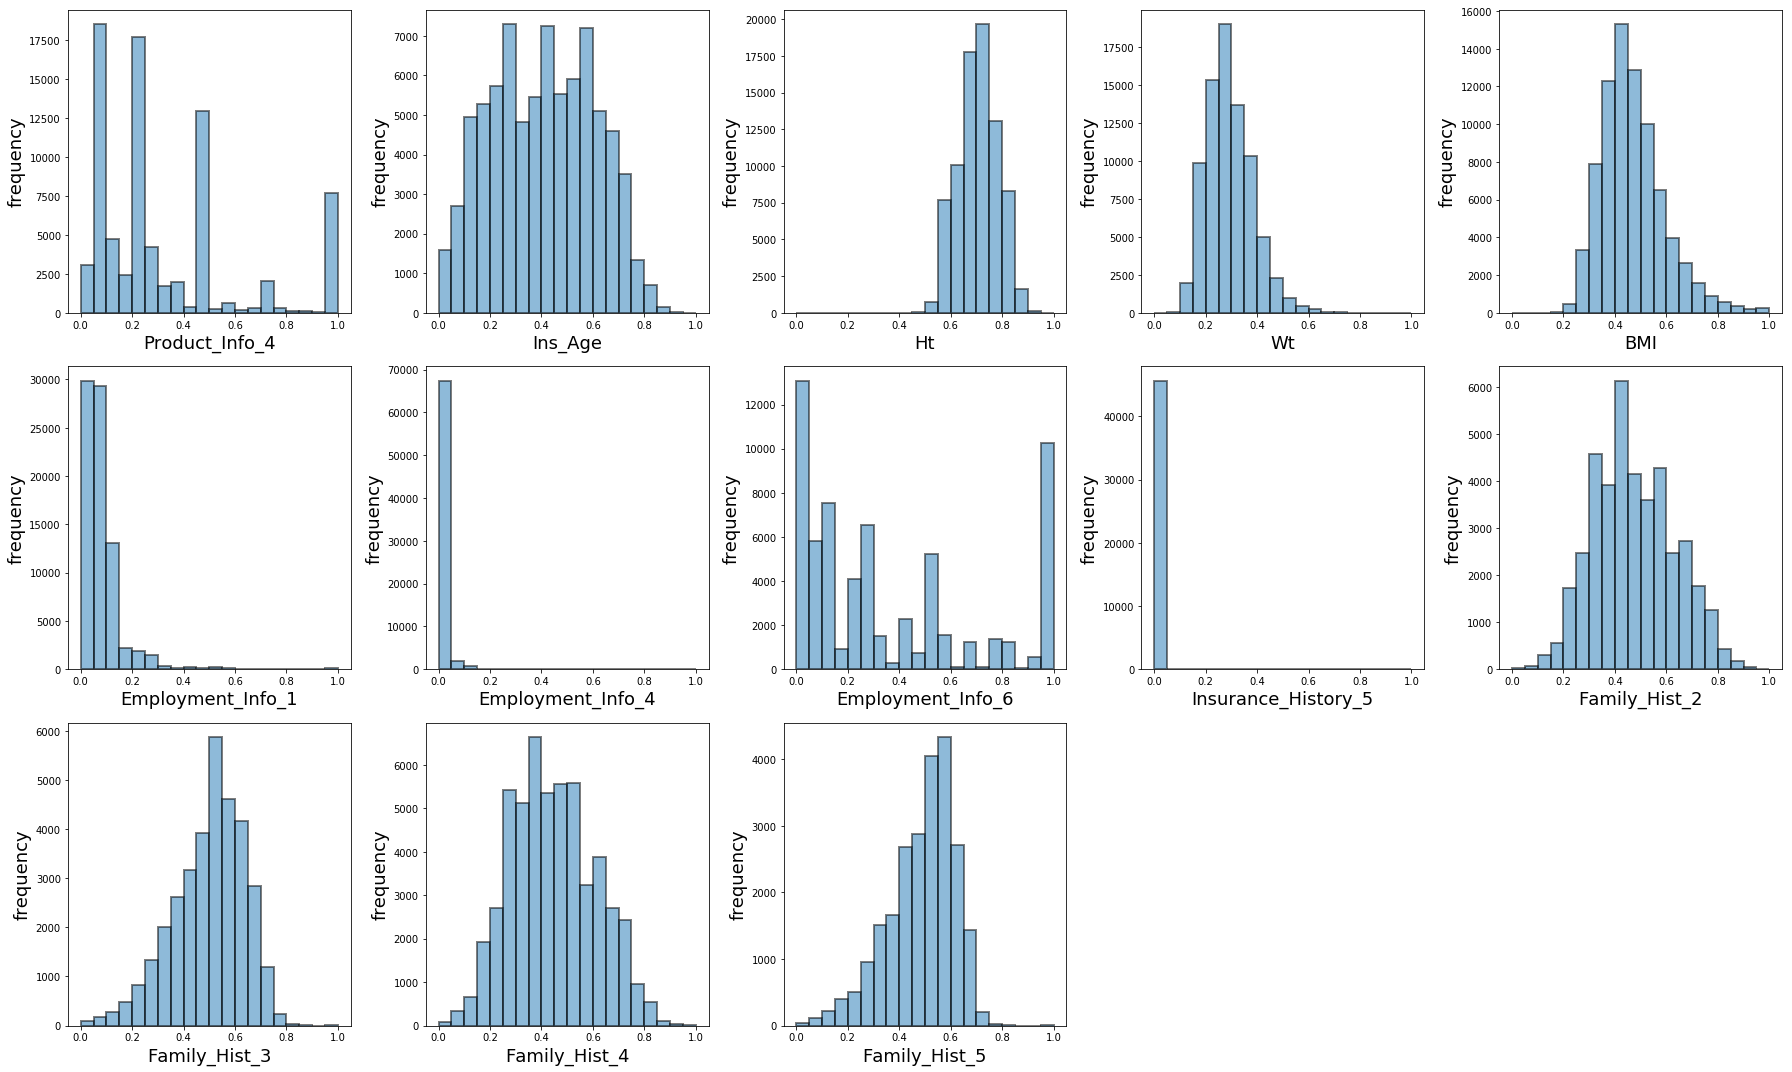

In [10]:
def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, \
                 edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)

## Appling Box-Cox transformations on the continuous data
##### Because some distributions are skewed.

In [11]:
def preproc_quantitatives(X):
    Y = X.copy()

    # apply Box-Cox transformations on non-missing values
    not_missing = Y[~Y.isnull()].copy()
    not_missing = not_missing - np.min(not_missing)+ 1e-10  # to avoid errors with non-positive values
    res = stats.boxcox(not_missing)
    Y[~Y.isnull()] = res[0]

    # normalize non-missing values
    mu = np.mean(Y[~Y.isnull()])
    sigma = Y[~Y.isnull()].std()
    Y = (Y - mu) / sigma

    # fill missing values with means
    Y[Y.isnull()] = 0.0

    return Y


## preprocessing continuous data

In [12]:
for col in continuous_data.columns:
    continuous_data[col] = preproc_quantitatives(continuous_data[col])

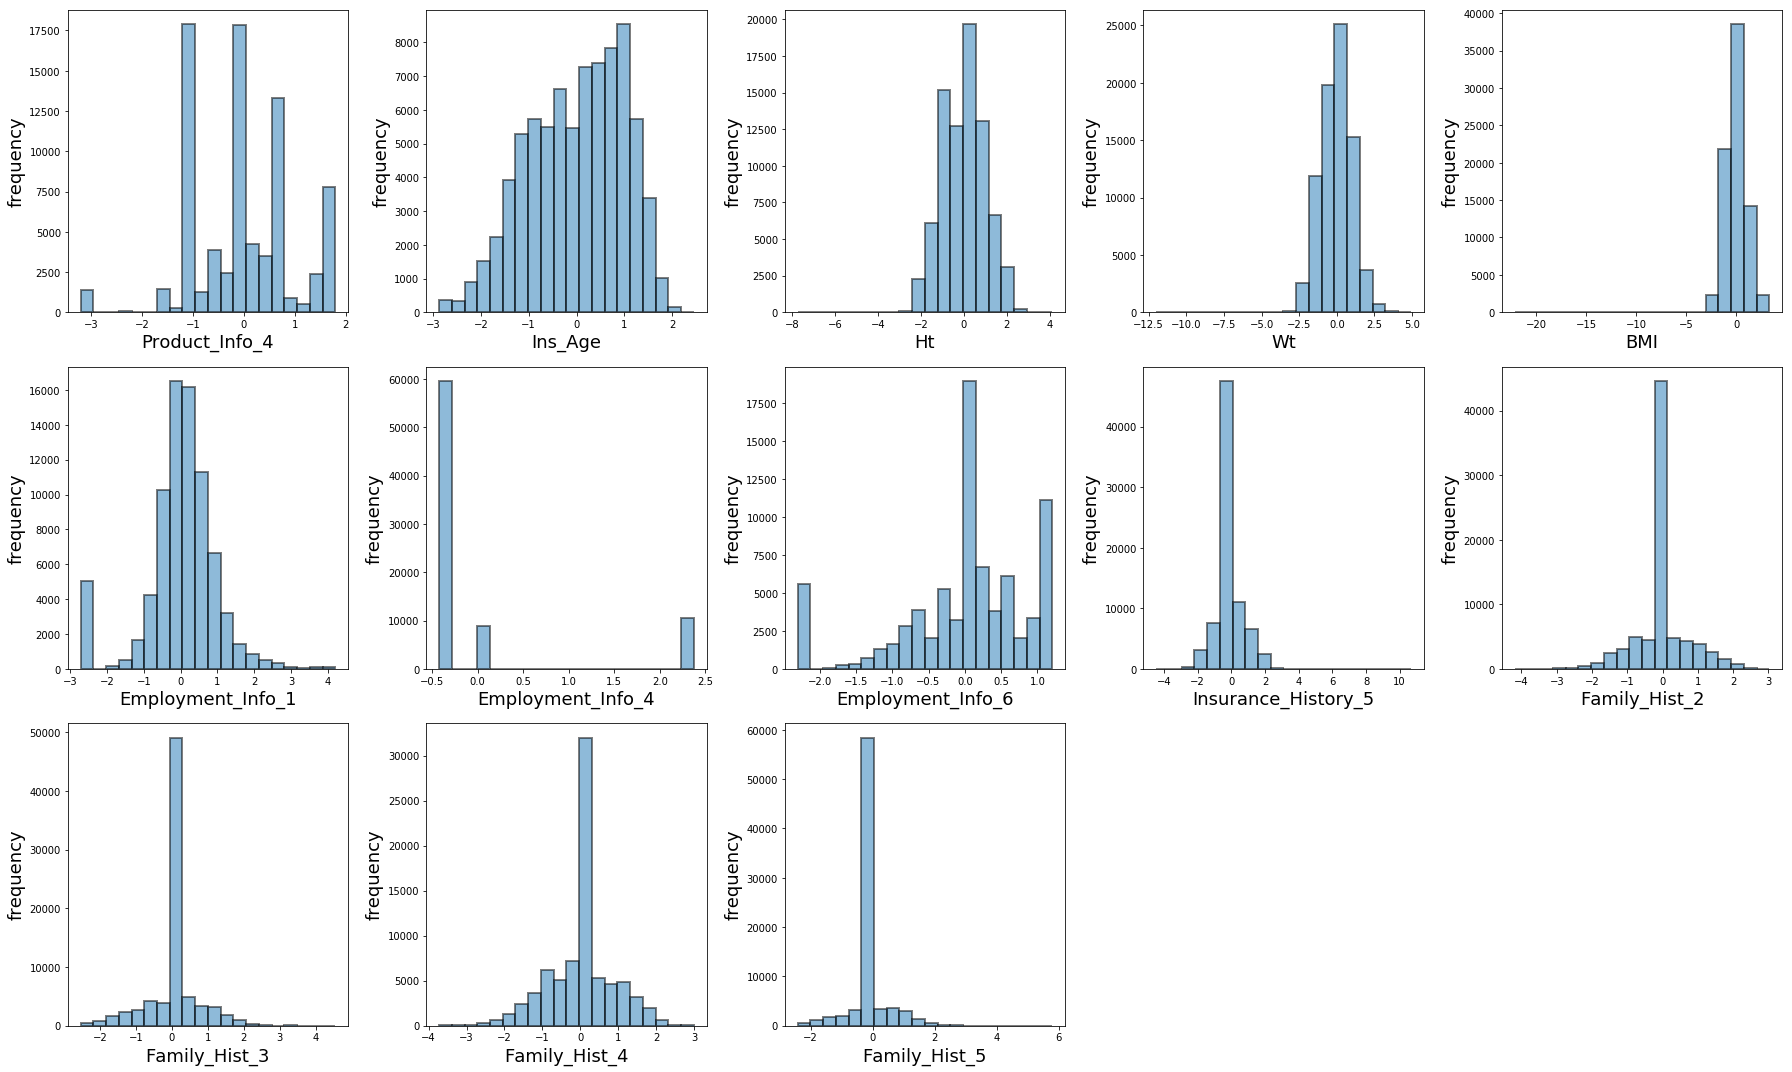

In [13]:
#plotting a histogram for the continuous data
plot_histgrams(continuous_data)

## Preprocessing & display discrete data

In [14]:
for col in discrete_data.columns:
    discrete_data[col] = preproc_quantitatives(discrete_data[col])

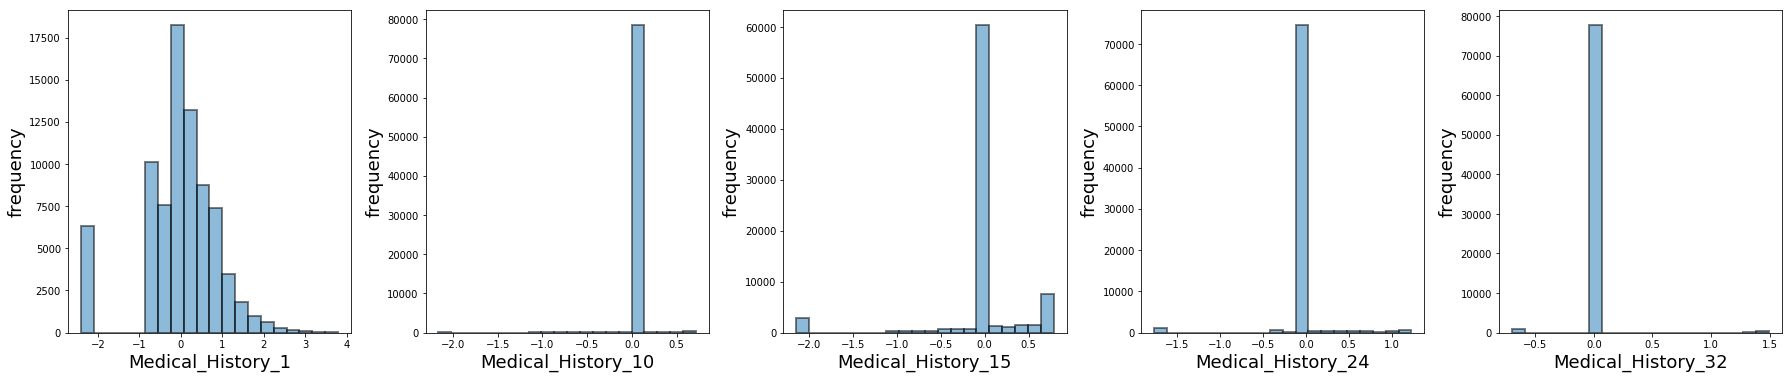

In [15]:
plot_histgrams(discrete_data)

## Treatment of discrete data with the same manner as the one for continuous data.

### Preprocessing and displaying the discrete data

In [16]:
for col in discrete_data.columns:
    discrete_data[col] = preproc_quantitatives(discrete_data[col])

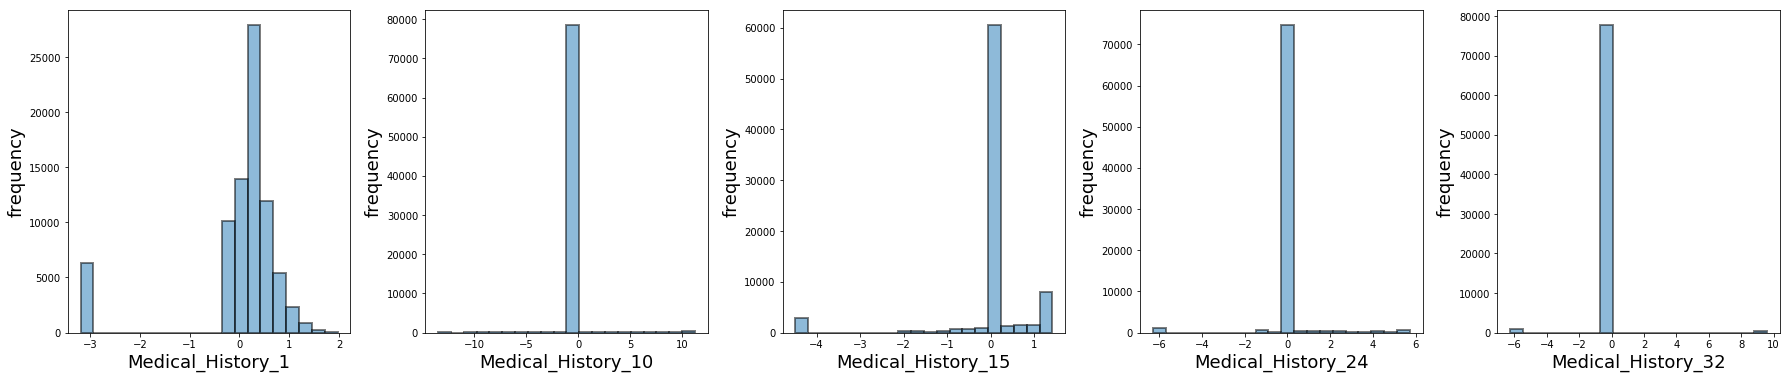

In [17]:
plot_histgrams(discrete_data)

## Train & test split 
#### I used RandomForest Classifier to predict target variables.
#### using 40000 rows for train and 10000 rows for test.

In [21]:
y = TRAIN_DATA['Response']
configs = {'quantitative variables only' : pd.concat([continuous_data, discrete_data], axis = 1),
           'qualitative  variables only' : pd.concat([categorical_data, dummy_data], axis = 1),
           'all data' : pd.concat([continuous_data, discrete_data, categorical_data, dummy_data], axis = 1)}
for title, X in configs.items():
    X_train = X[:40000]
    X_test = X[40000:50000]
    y_train = y[:40000]
    y_test = y[40000:50000]

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print("Classification report")
print(classification_report(y_test,rfc_pred))

[[ 212  137   11   22   81  243   85  239]
 [ 123  230    6   17  141  263   83  226]
 [  29   14   45   40   15   27    1    9]
 [  13    4    6  155    0   24    4   35]
 [  40   64    0    0  444  211   30  122]
 [  83   53    0    1   80 1043  180  470]
 [  25   16    0    1   21  358  381  572]
 [   3    4    0    0    7  197   68 2986]]


Classification report
              precision    recall  f1-score   support

           1       0.40      0.21      0.27      1030
           2       0.44      0.21      0.29      1089
           3       0.66      0.25      0.36       180
           4       0.66      0.64      0.65       241
           5       0.56      0.49      0.52       911
           6       0.44      0.55      0.49      1910
           7       0.46      0.28      0.35      1374
           8       0.64      0.91      0.75      3265

   micro avg       0.55      0.55      0.55     10000
   macro avg       0.53      0.44      0.46     10000
weighted avg       0.52      0.55  